In [12]:
import geopandas as gpd
import folium
import geopandas as gpd
import folium
from sklearn.cluster import KMeans
from shapely.geometry import Point
from shapely.geometry import LineString
## raj bhattarai mentor

In [13]:
#df = gpd.read_file("./hackathon-resources/islington/islington_aoi.geojson")
from scipy.spatial import ConvexHull
df = gpd.read_file("./islington.geojson")
df['geometry'] = df['geometry'].apply(lambda x: Point(x.centroid.x, x.centroid.y))

# Get the centroid coordinates as input for K-means clustering
X = df['geometry'].apply(lambda p: [p.x, p.y]).tolist()

# Specify the number of clusters
k = 17  # Replace with the desired number of clusters

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

# Assign the cluster labels to the DataFrame
df['cluster_label'] = kmeans.labels_
clustered_boxes = []
for cluster_label in df['cluster_label'].unique():
    cluster_features = df[df['cluster_label'] == cluster_label]
    cluster_box = cluster_features.total_bounds  # Bounding box coordinates: (minx, miny, maxx, maxy)
    clustered_boxes.append(cluster_box)
# Create a Folium map centered around the data points
m = folium.Map(location=[df['geometry'].apply(lambda p: p.y).mean(), df['geometry'].apply(lambda p: p.x).mean()], zoom_start=13)
for cluster_box in clustered_boxes:
    box_coords = [[cluster_box[1], cluster_box[0]], [cluster_box[3], cluster_box[0]], [cluster_box[3], cluster_box[2]], [cluster_box[1], cluster_box[2]], [cluster_box[1], cluster_box[0]]]
    folium.Polygon(locations=box_coords, color='blue', fill=True, fill_color='blue', fill_opacity=0.2).add_to(m)
# Define a color palette for the clusters
colors = ['red', 'green', 'blue', 'purple', 'orange', 'teal', 'black']  # Add more colors if needed
### Wayyy too bugggy to enable this(too many map markers to render in the browser)
# Add markers for each building, colored according to the cluster label
#for _, row in df.iterrows():
#    cluster_label = row['cluster_label']
#    color = colors[cluster_label]
#    folium.Marker([row['geometry'].y, row['geometry'].x], icon=folium.Icon(color=color)).add_to(m)

# Display the map
m

/home/anukul/project/hackathon/FMTM/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Plan
- divide the given bounding box(primary area to field map) into further smaller boundig boxes into a atomic bounding box that doesn't contain any obstacles(highway, waterway etc.)
- now using kmeans clustering we divide the atomic bounding boxes to futher clusters according to the density of the buildings and total area covered so the ratio of the density and area travel is approximately the same
- aggregating the clusters from above we again run kmeans clusterin on the aggregated clusters keeping in mind of the obstacles and non obstacles thus determining the optimal solution to the given problem

# Completed
- extracted the relevant data
- ran initial clustering on the given bounding box

# to implement
- properly divide the map using only the obstacles into multiple smaller bounding box for efficient kmeans clustering
- improve the algorithm for assigning the clusters
- implement to take the relevant input from the fmtm manager to get clusters according to the desired output.

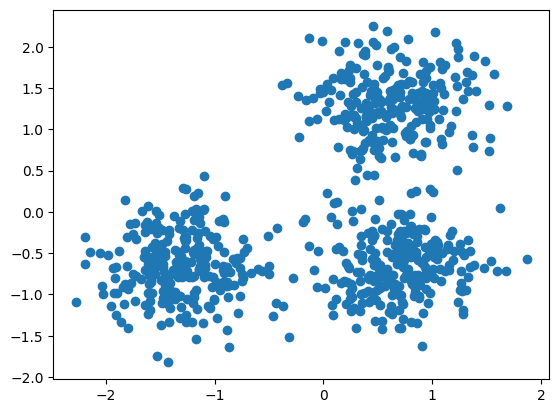

In [49]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()